In [5]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat
import os
plt.style.use('fivethirtyeight')


In [6]:
df = pd.read_csv("/Users/daniellancet/Desktop/Edu_Org_Ecology/Data/cleaned.csv")

In [7]:

# Scholarships, PTGS, K-12, Charter, Fundraising
scholarship_ntee = ["B82", "B825", "B824"]
PTGs_ntee = ["B94"]
P_12_ntee = ["B2", "B20", "B21", "B24", "B25", "B28", "B29"] # merged with charters? 
fundraising_ntee = ["B11", "B112", "B113", "B114", "B115", "B116", "B117", "B118", "B119", "B12", "B122", "B123", "B124","B125", "B126", "B127", "B128", "B129"]
fundraising_main_ntee = ["B12", "B122",  "B123",  "B124",  "B125",  "B126", "B127"]
k_12 = ["B20", "B2"]
B29_charters = ["B29"]


In [8]:
def count_range(low, high, series):
    count = np.sum((series > low) & (series <= high))
    return count



# Depricated Version of f_data_visualizer, good for testing :)
def f_data_visualizer(df, ntee_lst, column, title, year = 2019, labels = ["below 25k", "above 25k & below 100k", "above 100k & below 500k", "above 500k & below 1M", "above 1M"]):  
    pd.options.display.float_format = '{:.2f}'.format
    df = df[df["year"] == year]
    df = df[df["nteecc"].isin(ntee_lst)]

    # Top 10 Orgs
    top_10_df = df.sort_values(by = column, ascending=False).head(10)[["name", "ein", "nteecc", column]]
    
    f_series = df[column]
    
    # Series stats 
    f_series_desc = f_series.describe().to_frame()


    png_title = title.replace(" ", "_")
    
    total = len(f_series)
    print(total)
    below_25k = count_range(-np.inf, 25000, f_series)
    below_100k = count_range(25000, 100000, f_series)
    below_500k = count_range(100000, 500000, f_series)
    below_1M = count_range(500000, 1000000, f_series)
    above_1M = count_range(1000000, np.inf, f_series)
    
    assert((below_25k + below_100k + below_500k + below_1M + above_1M) == len(f_series))
   
    percents = (np.array([below_25k, below_100k, below_500k, below_1M, above_1M]) / total)*100

    # Bar Chart
    plt.figure(figsize=(12, 5))
    plt.bar(labels, percents)
    plt.ylabel('% of Orgs')
    plt.title(title)
    plt.xticks(fontsize=10 - 2)
    #plt.savefig("bar_chart_"+png_title+".png")
    plt.show()

    # Pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(percents, autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.2)
    plt.setp(autotexts, size=8)
    plt.title(title, fontsize=8)
    ax.legend(wedges, labels, title="Categories", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8);
    #plt.savefig("pie_chart" + png_title + ".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()

    # Histogram with log transformation
    min_val = f_series.min()
    print(np.sum(f_series < 0) == 0)
   
    plt.hist(np.log(f_series + 1 + abs(min_val)), bins=50, edgecolor = "black")
 
    
    plt.xlabel('Log Transformed Values')
    plt.ylabel('Frequency')
    plt.title('Log Transformed ' + title)
    #plt.savefig("log_hist"+ png_title+ "_" + str(year) + ".png")
    plt.show()


In [9]:

def count_range(low, high, series):
    count = np.sum((series > low) & (series <= high))
    return count

def f_data_visualizer(df, ntee_lst, column, title, year=2019, labels=["below 25k", "above 25k & below 100k", "above 100k & below 500k", "above 500k & below 1M", "above 1M"]):  
    
    """Generates a folder containing a pie chart, log-scaled histogram, bar chart, column description and top ten list for the finacial data in column for organizations 
    whoses ntee codes are in ntee lst"""
    
    
    pd.options.display.float_format = '{:.2f}'.format
    df = df[df["year"] == year]
    df = df[df["nteecc"].isin(ntee_lst)]

    # Top 10 Orgs
    top_10_df = df.sort_values(by=column, ascending=False).head(10)[["name", "ein", "nteecc", column]]
    
    f_series = df[column]
    
    # Series stats 
    f_series_desc = f_series.describe().to_frame()

    # Create a directory to save images
    folder_name = f"{title.replace(' ', '_')}_{year}"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    png_title = title.replace(" ", "_")
    
    total = len(f_series)
    below_25k = count_range(-np.inf, 25000, f_series)
    below_100k = count_range(25000, 100000, f_series)
    below_500k = count_range(100000, 500000, f_series)
    below_1M = count_range(500000, 1000000, f_series)
    above_1M = count_range(1000000, np.inf, f_series)
    
    assert((below_25k + below_100k + below_500k + below_1M + above_1M) == len(f_series))
   
    percents = (np.array([below_25k, below_100k, below_500k, below_1M, above_1M]) / total) * 100

    # Bar Chart
    plt.figure(figsize=(12, 5))
    plt.bar(labels, percents)
    plt.ylabel('% of Orgs')
    plt.title(title)
    plt.xticks(fontsize=10 - 2)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, "bar_chart_" + png_title + ".png"), bbox_inches='tight', pad_inches=0.1)
    plt.close()

    # Pie Chart
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(percents, autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.2)
    plt.setp(autotexts, size=8)
    plt.title(title, fontsize=8)
    ax.legend(wedges, labels, title="Categories", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, "pie_chart_" + png_title + ".png"), bbox_inches='tight', pad_inches=0.1)
    plt.close()

    # Histogram with log transformation
    min_val = f_series.min()
    plt.figure(figsize=(12, 5))
    plt.hist(np.log(f_series - min_val + 1), bins=50, edgecolor = "black")
    plt.xlabel('Absolute Min Shifted Log ' + column)
    plt.ylabel('Frequency')
    plt.title('Log Transformed ' + title)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, "log_hist_" + png_title + "_" + str(year) + ".png"), bbox_inches='tight', pad_inches=0.1)
    plt.close()

    # Save top 10 organizations table
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=top_10_df.values, colLabels=top_10_df.columns, cellLoc='center', loc='center')
    #table.auto_set_column_widths(True)
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.2, 1.2)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, "top_10_orgs_" + png_title + ".png"), bbox_inches='tight', pad_inches=0.1)
    plt.close()

    # Save series description table
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=f_series_desc.values, colLabels=f_series_desc.columns, rowLabels=f_series_desc.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, "series_description_" + png_title + ".png"), bbox_inches='tight', pad_inches=0.1)
    plt.close()



# f_data_visualizer(df, k_12, "exps", "K-12 Expenses")


In [16]:
# pd.options.display.float_format = '{:.2f}'.format
def admin_ratio(df, ntee_lst, title):
    df = df[df["nteecc"].isin(ntee_lst)] 
    
    admin_exps_charter = df["admin_r"] * df["exps"]
    admin_exps_charter.index.name = "admin_exps_"+title


    plt.hist(np.log(admin_exps_charter + 1), bins = 30, edgecolor = "black")
    plt.title("Log " + title + " Adminstration Expenses")
    plt.show()
    admin_exps_charter.describe()
    plt.hist(df["admin_r"], bins = 30, edgecolor = "black");
    plt.title(title + " Admin Expenses / Total Expenses")
    plt.show()

    desc_df_1 = admin_exps_charter.describe().to_frame().rename({0: "admin_exps_" + title}, axis=1)
    desc_df_2 = df["admin_r"].describe().to_frame().rename({"admin_r":"admin_r_" + title}, axis = 1)
    display(desc_df_1)
    display(desc_df_2)

    top_20 = df.sort_values(by = "admin_r", ascending=False).head(20)[["name", "ein", "admin_r", "exps", "assets", "totrev"]]
    display(top_20)
admin_ratio(df, scholarship_ntee, "Scholarship")

KeyError: 'admin_r'

In [ ]:
def admin_ratio(df, ntee_lst, year, title):
    # Create directory for the given year and title
    dir_name = f"{year}_{title}_admin_r"
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    
    # Filter dataframe based on year and ntee_lst
    df = df[df["year"] == year]
    df = df[df["nteecc"].isin(ntee_lst)]
    
    # Calculate admin_exps_charter
    admin_exps_charter = df["admin_r"] * df["exps"]
    admin_exps_charter.index.name = "admin_exps_" + title

    # Plot histogram of log(admin_exps_charter + 1)
    plt.figure()
    plt.hist(np.log(admin_exps_charter + 1), bins=30, edgecolor="black")
    plt.title("Log " + title + " Administration Expenses")
    plt.xlabel("Log(Admin Expenses + 1)")
    plt.ylabel("Frequency")
    plt.savefig(os.path.join(dir_name, f"log_{title}_admin_expenses.png"), bbox_inches='tight', pad_inches=0.1)
    plt.close()

    # Plot histogram of admin_r
    plt.figure()
    plt.hist(df["admin_r"], bins=30, edgecolor="black")
    plt.title(title + " Admin Expenses / Total Expenses")
    plt.xlabel("Admin Expenses / Total Expenses")
    plt.ylabel("Frequency")
    plt.savefig(os.path.join(dir_name, f"{title}_admin_expenses_ratio.png"), bbox_inches='tight', pad_inches=0.1)
    plt.close()

    # Describe admin_exps_charter and save to CSV
    desc_df_1 = admin_exps_charter.describe().to_frame(name="admin_exps_" + title)
    desc_df_1.to_csv(os.path.join(dir_name, f"desc_{title}_admin_exps.csv"))

    # Describe admin_r and save to CSV
    desc_df_2 = df["admin_r"].describe().to_frame(name="admin_r_" + title)
    desc_df_2.to_csv(os.path.join(dir_name, f"desc_{title}_admin_r.csv"))

    # Display the dataframes
    display(desc_df_1)
    display(desc_df_2)

    # Get top 20 entries by admin_r and save to CSV
    top_20 = df.sort_values(by="admin_r", ascending=False).head(20)[["name", "ein", "admin_r", "exps", "assets", "totrev"]]
    top_20.to_csv(os.path.join(dir_name, f"top_20_{title}_admin_r.csv"))

    # Display the top 20 dataframe
    display(top_20)
    

#admin_ratio(df,scholarship_ntee, 2019, "Scholarship")

In [ ]:
def percents(df, ntee_lst, column, intervals, year = 2019):  
    pd.options.display.float_format = '{:.2f}'.format
    df = df[df["year"] == year]
    df = df[df["nteecc"].isin(ntee_lst)]


    f_series = df[column]
    total = len(f_series)

    counts = []
    for interval in intervals: 
        low, high = interval
        count = count_range(low, high, f_series)
        counts.append(count)
    counts = np.array(counts)
    
    assert(np.sum(counts) == total)
   
    percents_lst = (counts/np.sum(counts))*100
    return percents_lst
intervals_k_12_charter = [(-np.inf, 25000), (25000, 100000), (100000, 500000), (500000, 1000000), (1000000, 2500000), (2500000, 5000000), (5000000, 10000000), (10000000, np.inf)]
intervals_fundraising = [(-np.inf, 0), (0, 10000), (10000, 25000), (25000, 100000), (100000, 500000), (500000, 1000000), (1000000, np.inf)]
intervals_PTG = [
    (-np.inf, 0),
    (0, 10000),
    (10000, 25000),
    (25000, 50000),
    (50000, 100000),
    (100000, 150000),
    (150000, np.inf)
]

input = percents(df, scholarship_ntee, "exps", intervals_fundraising)
input

array([ 2.37524515, 16.8664197 , 15.4499891 , 33.97254304, 20.28764437,
        4.16212683,  6.88603182])

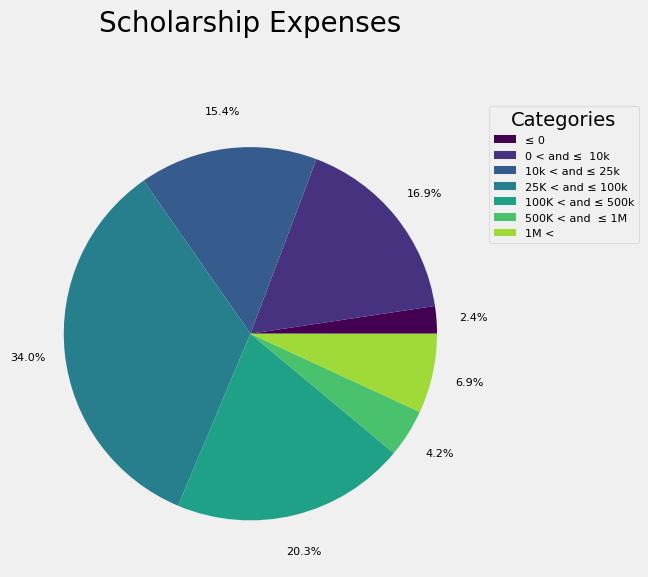

In [ ]:


fig, ax = plt.subplots(figsize=(8, 6))
#cmap = cmap = plt.get_cmap('viridis')
#colors_hex = [rgb2hex(cmap(i/14)) for i in range(len(input))]
from matplotlib.colors import to_hex

cmap = plt.get_cmap('viridis')

# Create a list of 15 colors, skipping every other color
colors = [to_hex(cmap(i / 14)) for i in range(0, 15, 2)]
wedges, texts, autotexts = ax.pie(input, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.2)
plt.setp(autotexts, size=8)
k_12_charter_labels = ["below 25k", "above 25k & below 100k", "above 100k & below 500k", "above 500k & below 1M", "above 1M and below or equal to 2.5M", "Above 2.5M and below 5M", "Above 5M below 10M", "Above 10M"]
fundraising_labels = ["≤ 0 ", "0 < and ≤  10k", "10k < and ≤ 25k", "25K < and ≤ 100k", "100K < and ≤ 500k", "500K < and  ≤ 1M", "1M < "]
PTG_labels = ["≤ 0", "0 < and ≤ 10K", "10K < and 25K", "25K < and ≤ 50K", "50K < and ≤ 100K", "100K < and ≤ 150K", "150K <"]
ax.legend(wedges, fundraising_labels, title="Categories", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)
plt.title("Scholarship Expenses", fontsize = 20, pad = 50)
plt.tight_layout()



In [ ]:
# fix histograms
def hist_series(df, ntee_lst, column, year = 2019):  
    pd.options.display.float_format = '{:.2f}'.format
    df = df[df["year"] == year]
    df = df[df["nteecc"].isin(ntee_lst)]


    f_series = df[column]
    return f_series

h_series = hist_series(df, scholarship_ntee, "assets")
top_10_removed = h_series[h_series < 178958646]

In [ ]:
def interquartile_series(series, percentile_range):
    """
    Filters a pandas Series based on a specified percentile range.

    Parameters:
    series (pd.Series): The input pandas Series containing float values.
    percentile_range (tuple): A tuple defining the lower and upper bounds of the percentile range (e.g., (0.25, 0.75)).

    Returns:
    pd.Series: A pandas Series containing only the values that fall within the specified percentile range.
    """
    lower_percentile, upper_percentile = percentile_range
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    
    return series[(series >= lower_bound) & (series <= upper_bound)]

inter_quartile_series = interquartile_series(h_series, (0.0, 0.75))
inter_quartile_series_big = interquartile_series(h_series, (0.0, 0.95))



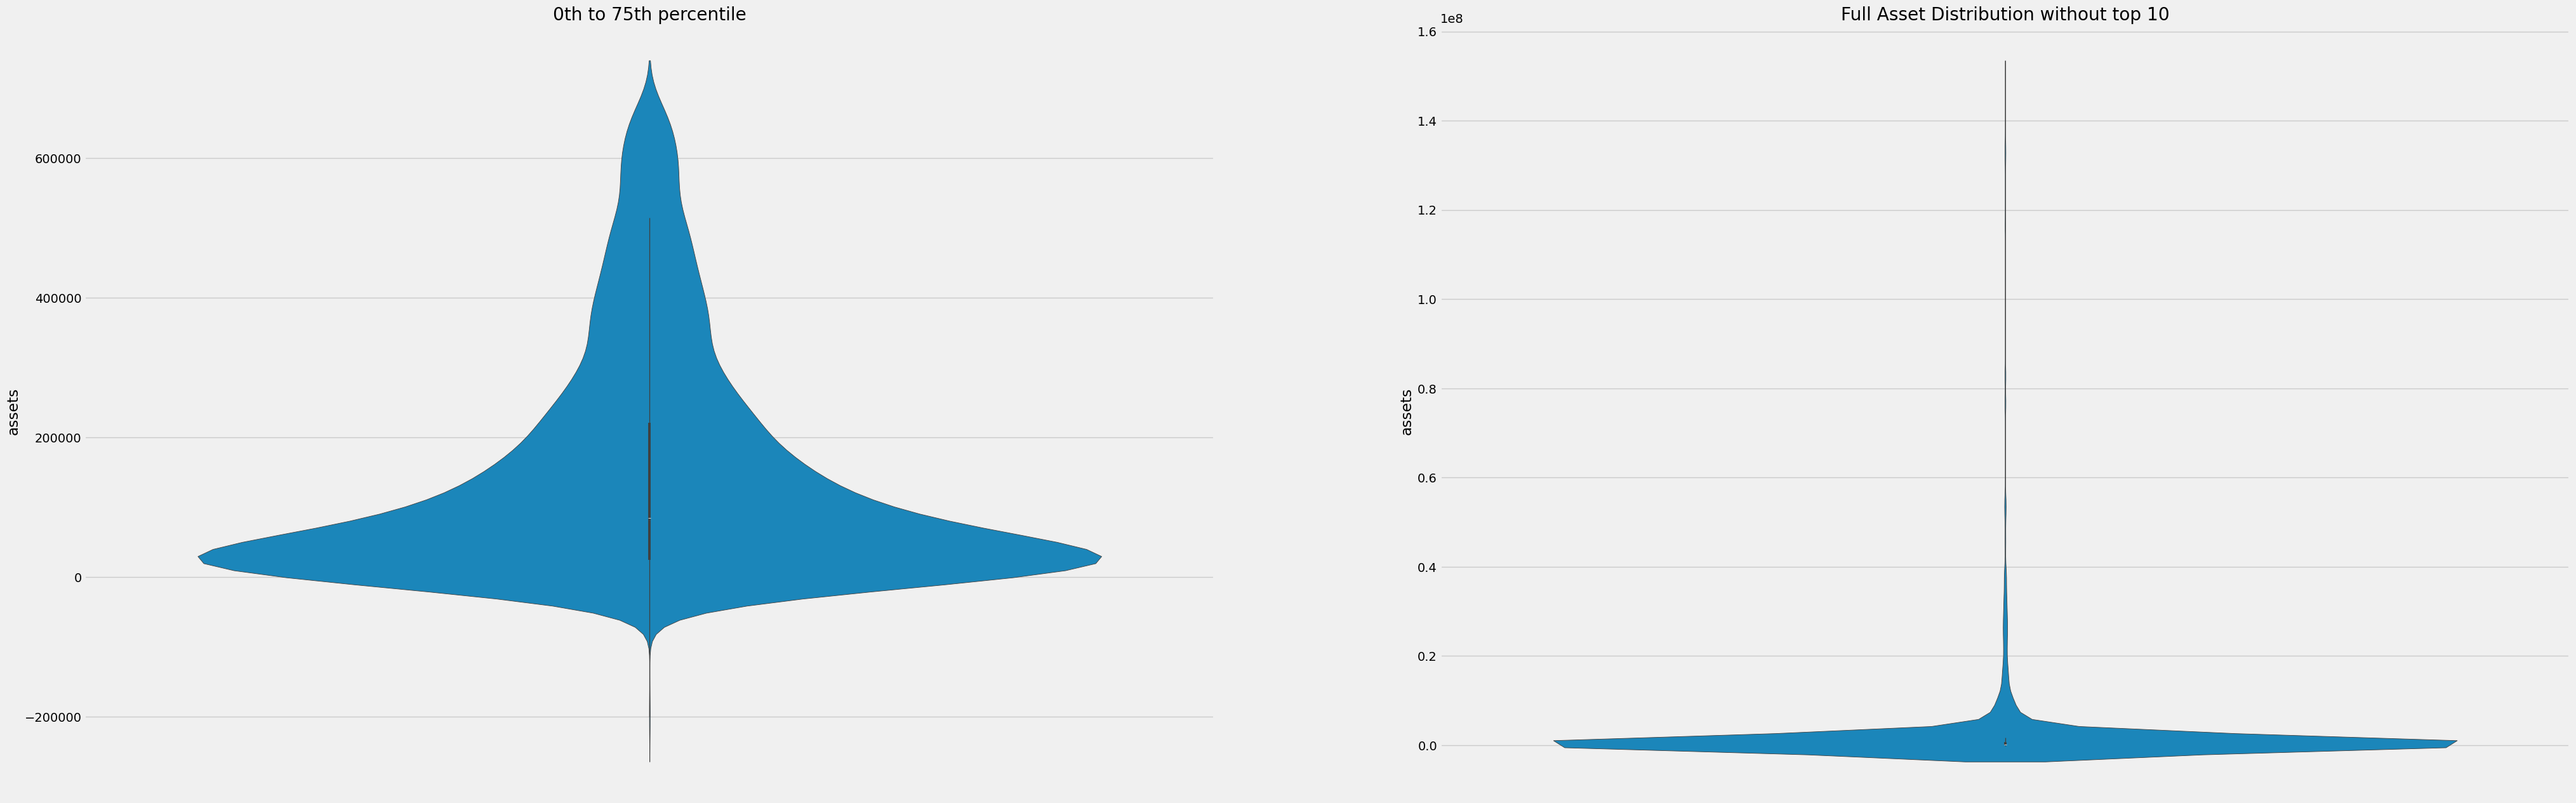

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (45, 15));
sns.violinplot(inter_quartile_series, ax = ax[0]);
sns.violinplot(top_10_removed, ax = ax[1]);
ax[0].title.set_text("0th to 75th percentile")
ax[1].title.set_text("Full Asset Distribution without top 10")

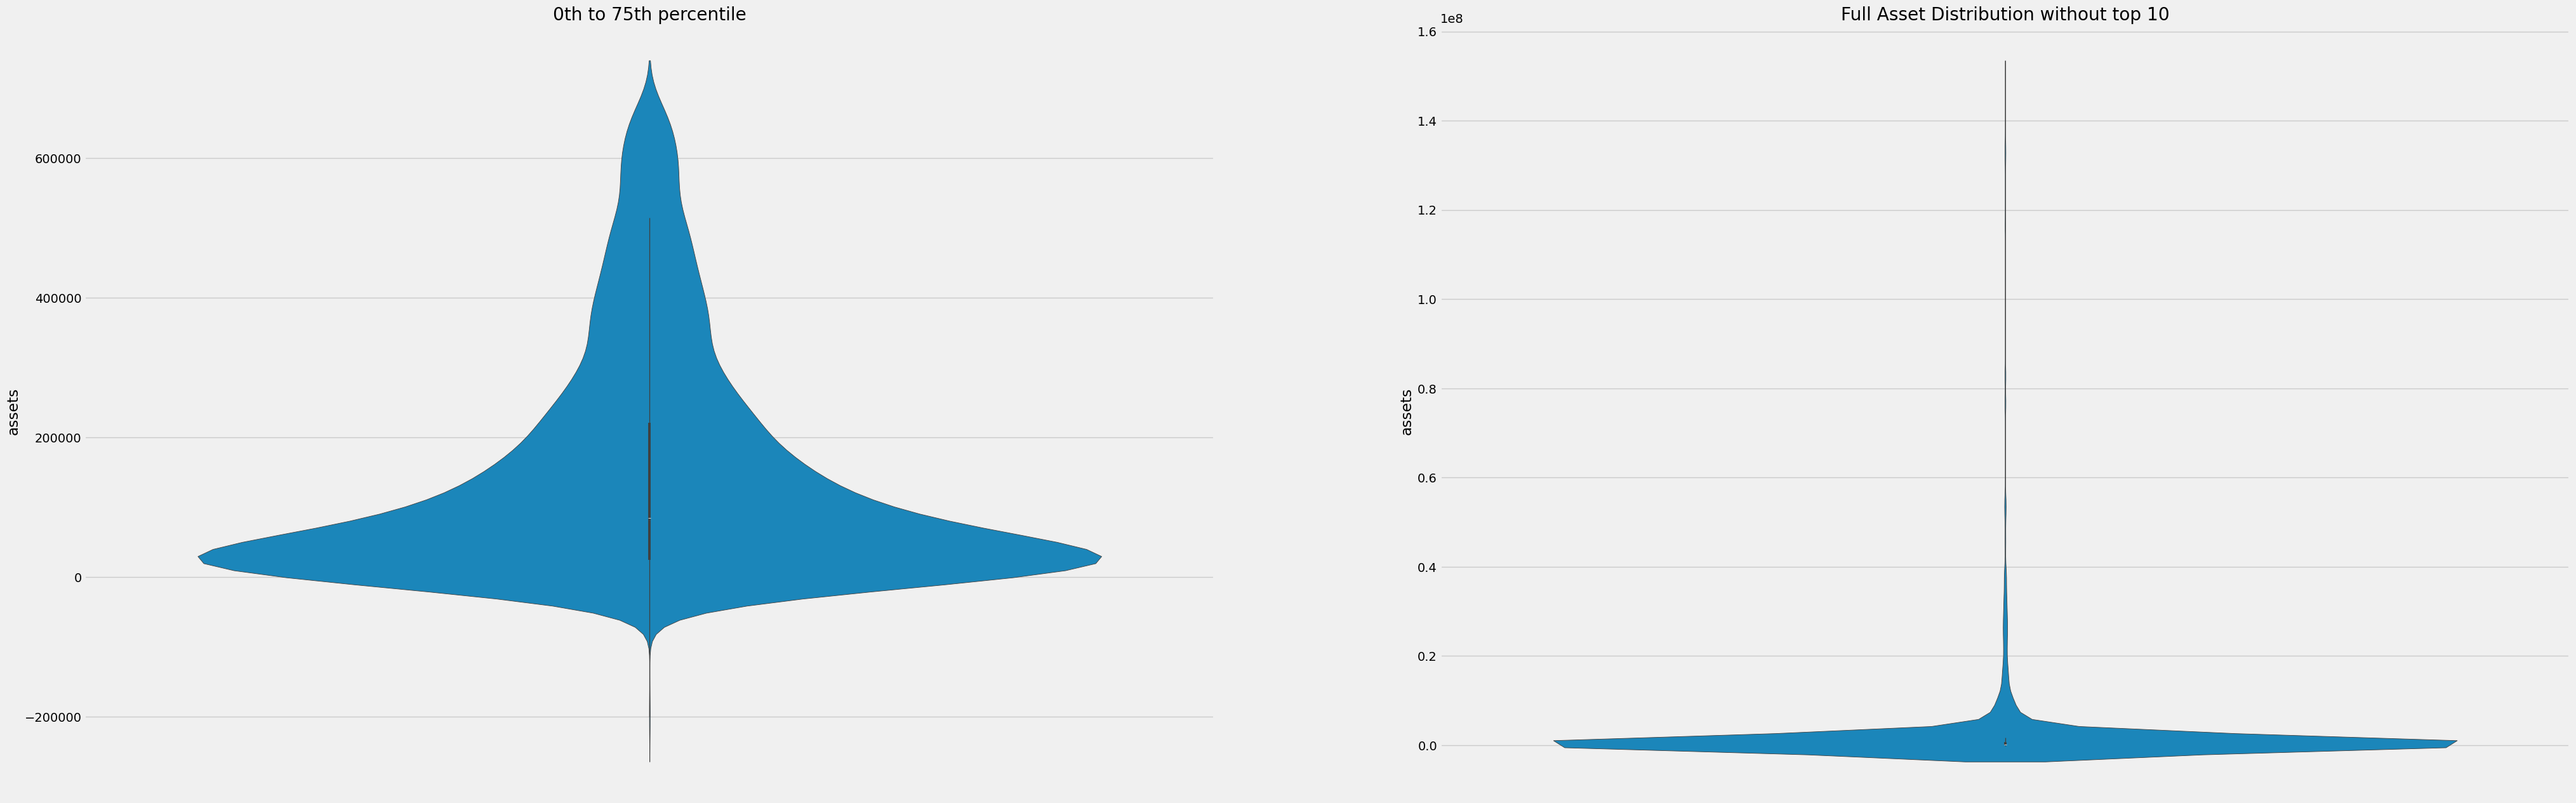

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (45, 15));
sns.violinplot(inter_quartile_series, ax = ax[0]);
sns.violinplot(top_10_removed, ax = ax[1]);
ax[0].title.set_text("0th to 75th percentile")
ax[1].title.set_text("Full Asset Distribution without top 10")

(<Axes: title={'center': 'Empircal Cumulative Distribution Function (CDF) of Asset Values'}, xlabel='Asset Value', ylabel='CDF'>,
 array([<Axes: title={'center': '0th to 75th percentile'}, ylabel='assets'>,
        <Axes: title={'center': 'Full Asset Distribution without top 10'}, ylabel='assets'>],
       dtype=object))

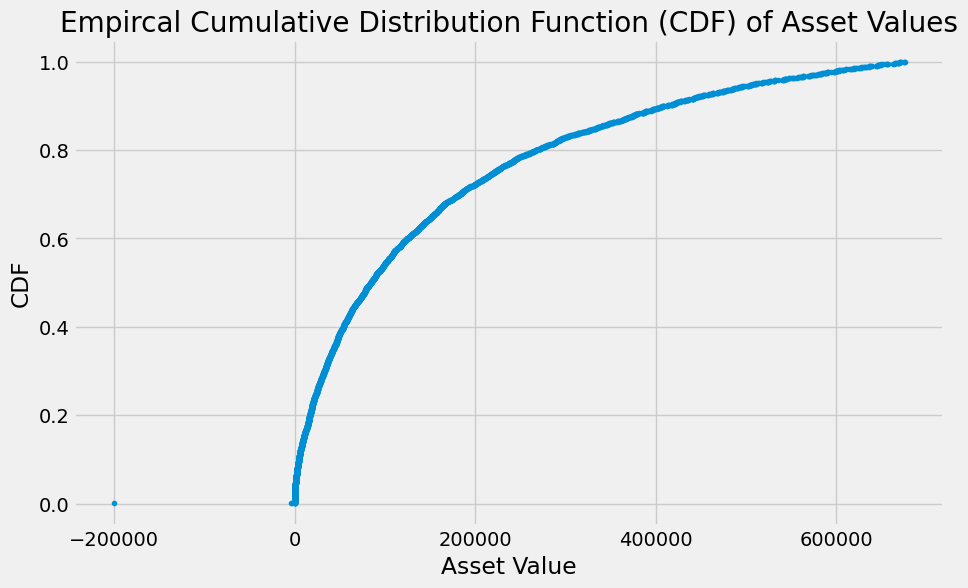

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_cdf(series):
# Sample data: replace this with your asset values

    # Sort the asset values
    sorted_series = np.sort(series)

    # Calculate the CDF values
    cdf_values = np.arange(1, len(sorted_series) + 1) / len(sorted_series)

    # Plot the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_series, cdf_values, marker='.', linestyle='none')
    fig = plt.gca()
    plt.xlabel('Asset Value')
    plt.ylabel('CDF')
    plt.title('Empircal Cumulative Distribution Function (CDF) of Asset Values')
    plt.grid(True)
    return fig, ax
plot_cdf(inter_quartile_series)


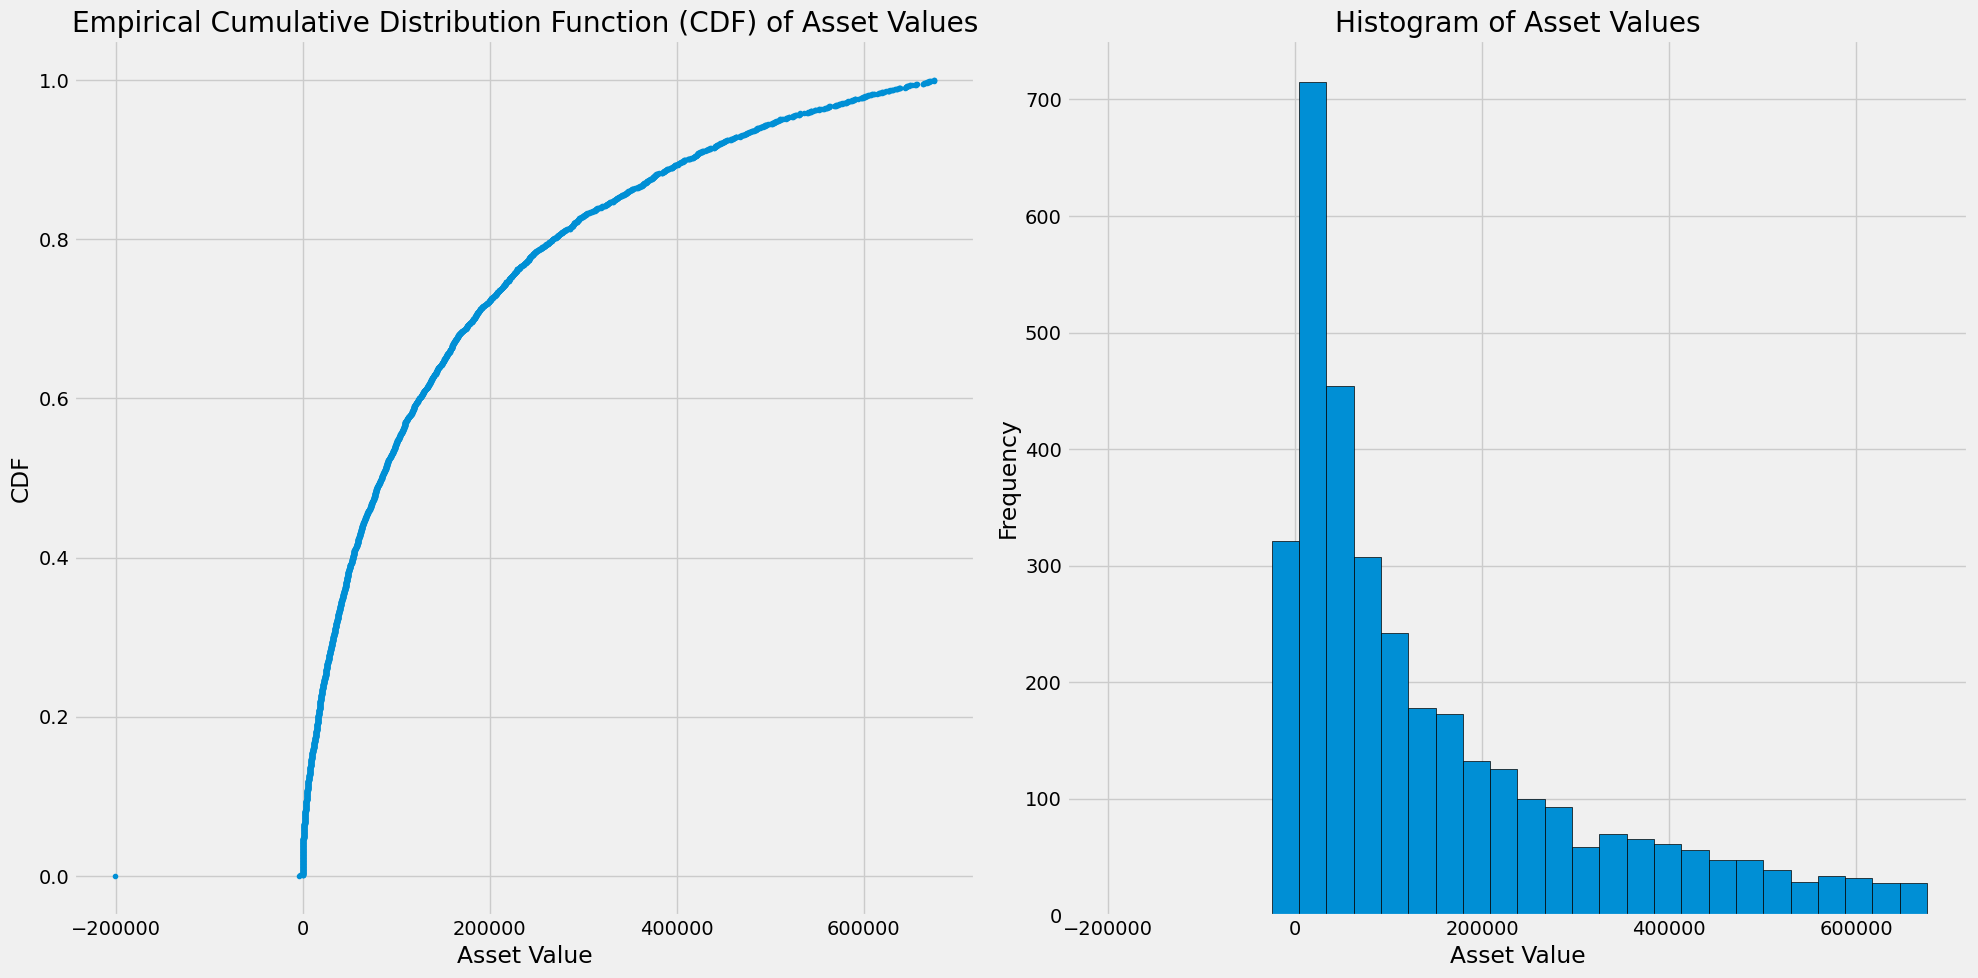

In [ ]:

def plot_cdf(series, ax):
    # Sort the series
    sorted_series = np.sort(series)
    
    # Calculate the CDF values
    cdf_values = np.arange(1, len(sorted_series) + 1) / len(sorted_series)
    
    # Plot the CDF
    ax.plot(sorted_series, cdf_values, marker='.', linestyle='none')
    ax.set_xlabel('Asset Value')
    ax.set_ylabel('CDF')
    ax.set_title('Empirical Cumulative Distribution Function (CDF) of Asset Values')
    ax.grid(True)
    return ax

fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Adjust size as needed

# Plot the CDF on the first subplot
plot_cdf(inter_quartile_series, ax[0])

# You can add another plot or some visualization on the second subplot (ax[1])
# For example, let's plot a histogram
ax[1].hist(inter_quartile_series, bins=30, edgecolor='black')
ax[1].set_xlabel('Asset Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Asset Values')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:

scholarship_assets = hist_series(df, scholarship_ntee, "assets")
scholarship_expenses = hist_series(df, scholarship_ntee, "exps")
scholarship_totrev = hist_series(df, scholarship_ntee, "totrev")


def display_grid(h_series, title, column, n_bins = 50):
    quartile_75th = interquartile_series(h_series, (0.0, 0.75))
    quartile_95th = interquartile_series(h_series, (0.0, 0.95))
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 20))
    
    # Plot the violin plots
    sns.violinplot(x=quartile_75th, ax=ax[0][0])
    sns.violinplot(x=quartile_95th, ax=ax[1][0])
    
    # Plot the histograms
    hist_75th = sns.histplot(quartile_75th, ax=ax[0][1], bins=n_bins, kde=False)
    hist_95th = sns.histplot(quartile_95th, ax=ax[1][1], bins=n_bins, kde=False)
    
    # Set titles
    ax[0][0].title.set_text(f"{title} {column}: (0 to 75th) Percentile Violin Plot")
    ax[0][1].title.set_text(f"{title} {column}: (0 to 75th) Histogram")
    ax[1][0].title.set_text(f"{title} {column}: (0 to 95th) Violin Plot")
    ax[1][1].title.set_text(f"{title} {column}: (0 to 95th) Histogram")
    
    # Calculate and display bin width information for the histograms
    bin_edges_75 = hist_75th.patches[0].get_x(), hist_75th.patches[-1].get_x() + hist_75th.patches[-1].get_width()
    bin_width_75 = (bin_edges_75[1] - bin_edges_75[0]) / n_bins

    bin_edges_95 = hist_95th.patches[0].get_x(), hist_95th.patches[-1].get_x() + hist_95th.patches[-1].get_width()
    bin_width_95 = (bin_edges_95[1] - bin_edges_95[0]) / n_bins

    ax[0][1].text(0.95, 0.95, f"Bin width: {bin_width_75:.2f}", transform=ax[0][1].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
    ax[1][1].text(0.95, 0.95, f"Bin width: {bin_width_95:.2f}", transform=ax[1][1].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()



In [ ]:
def visualize_hists(df, ntee_type, title, n_bins = 50):
    assets = hist_series(df, ntee_type, "assets")
    expenses = hist_series(df, scholarship_ntee, "exps")
    totrev = hist_series(df, scholarship_ntee, "totrev")

    display_grid(assets, title = title, column= "Assets", n_bins = n_bins)
    display_grid(expenses, title = title, column = "Expenses", n_bins = n_bins)
    display_grid(totrev, title = title, column = "Total Revenue", n_bins = n_bins)


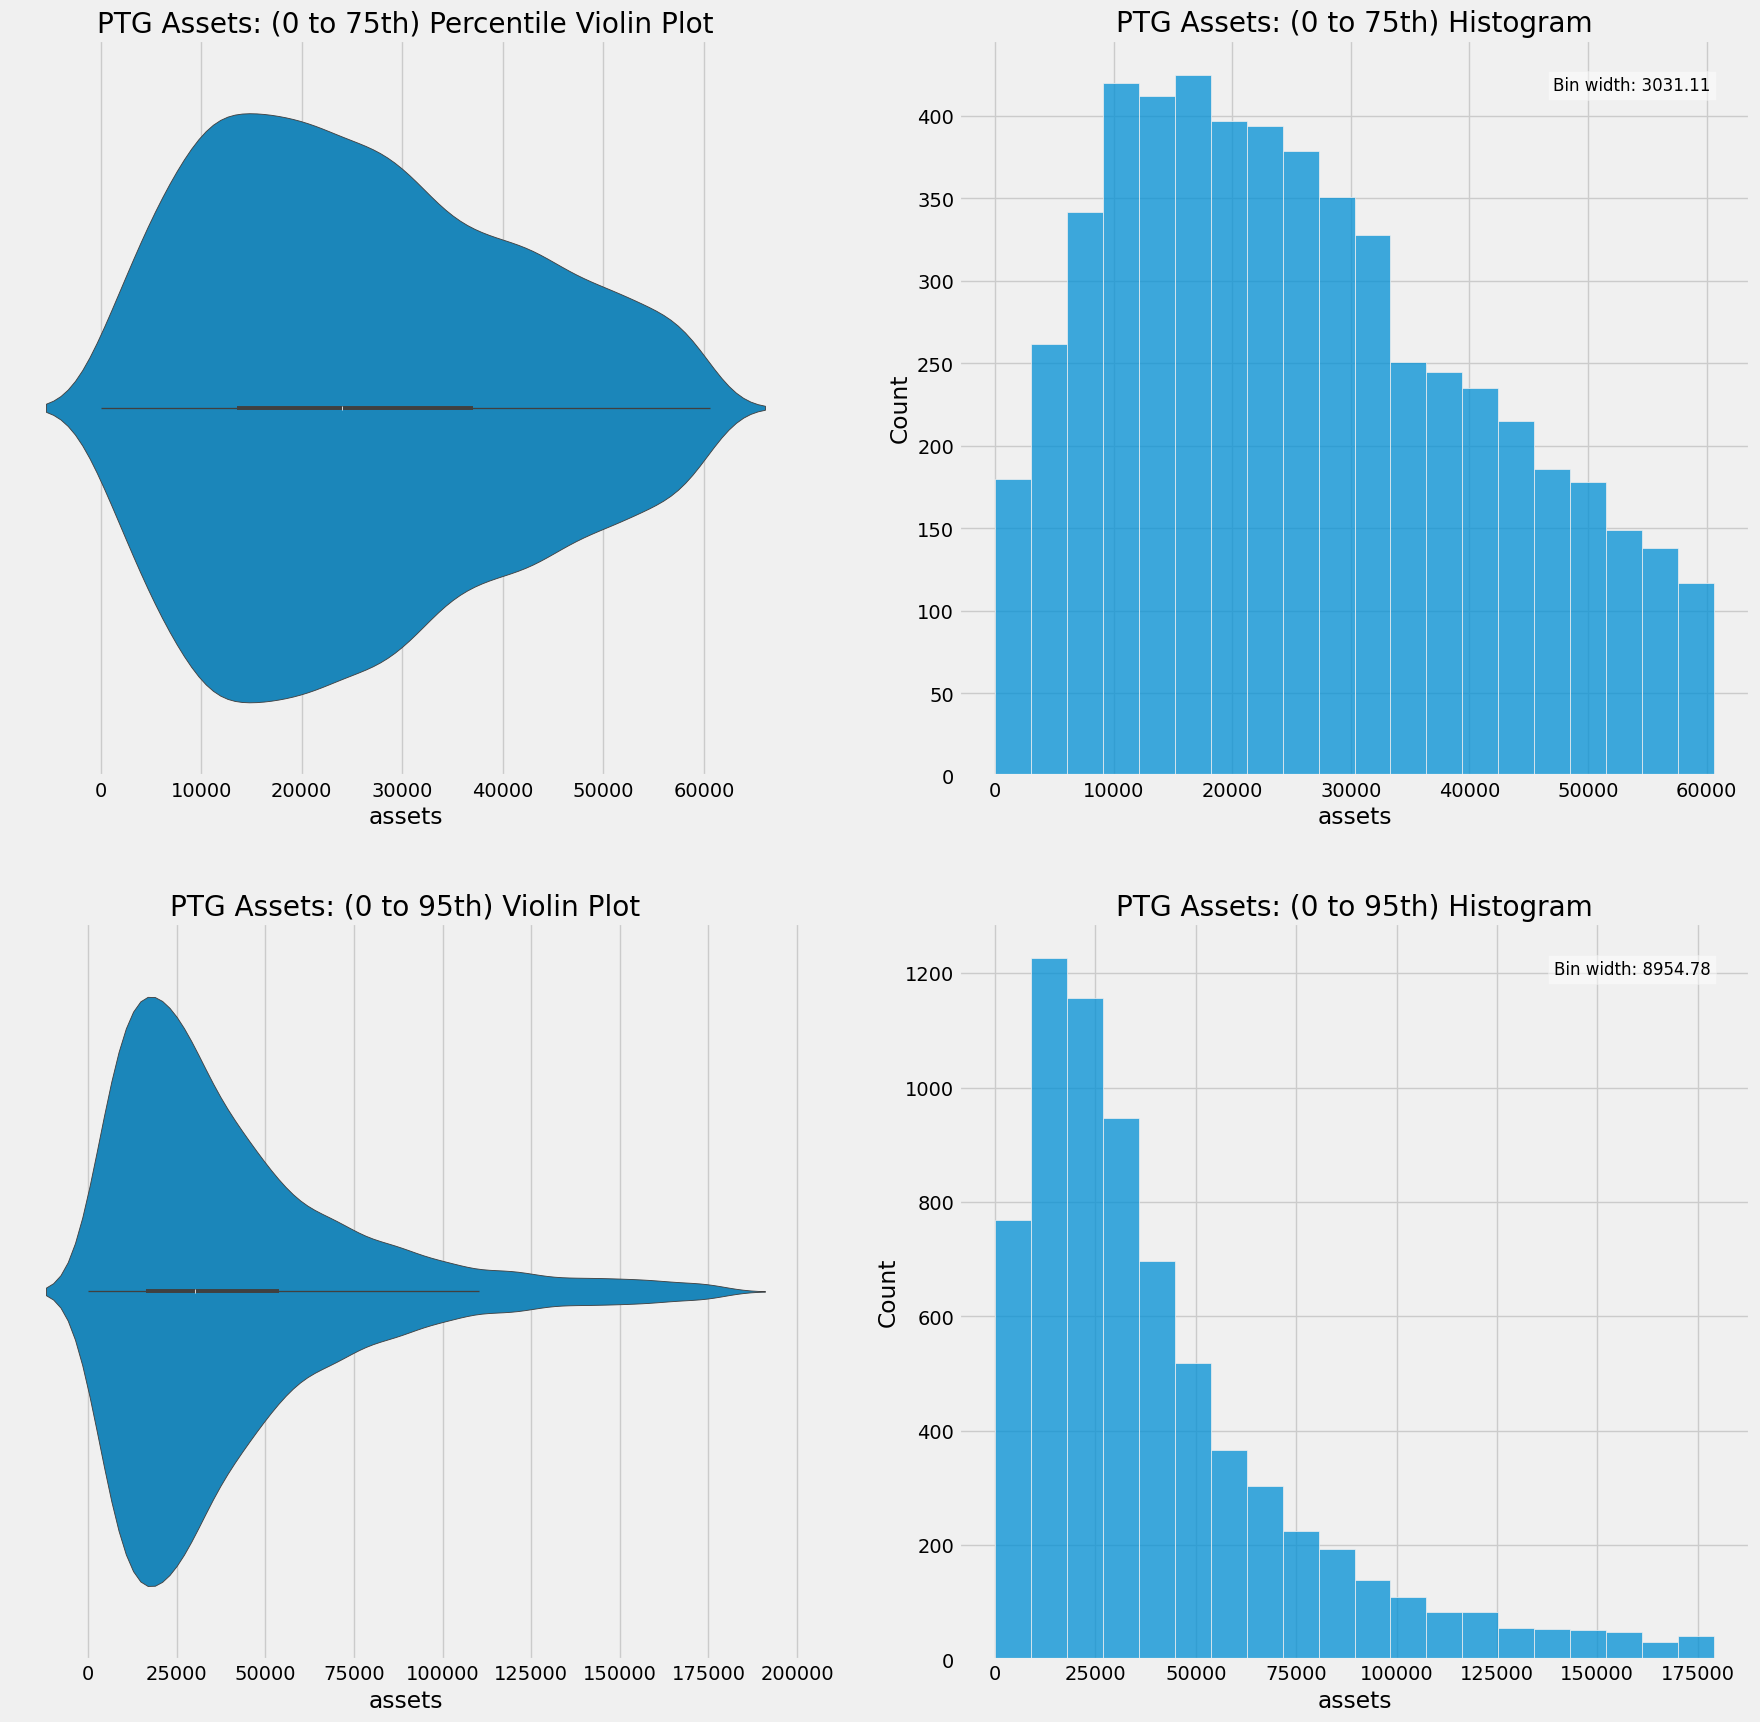

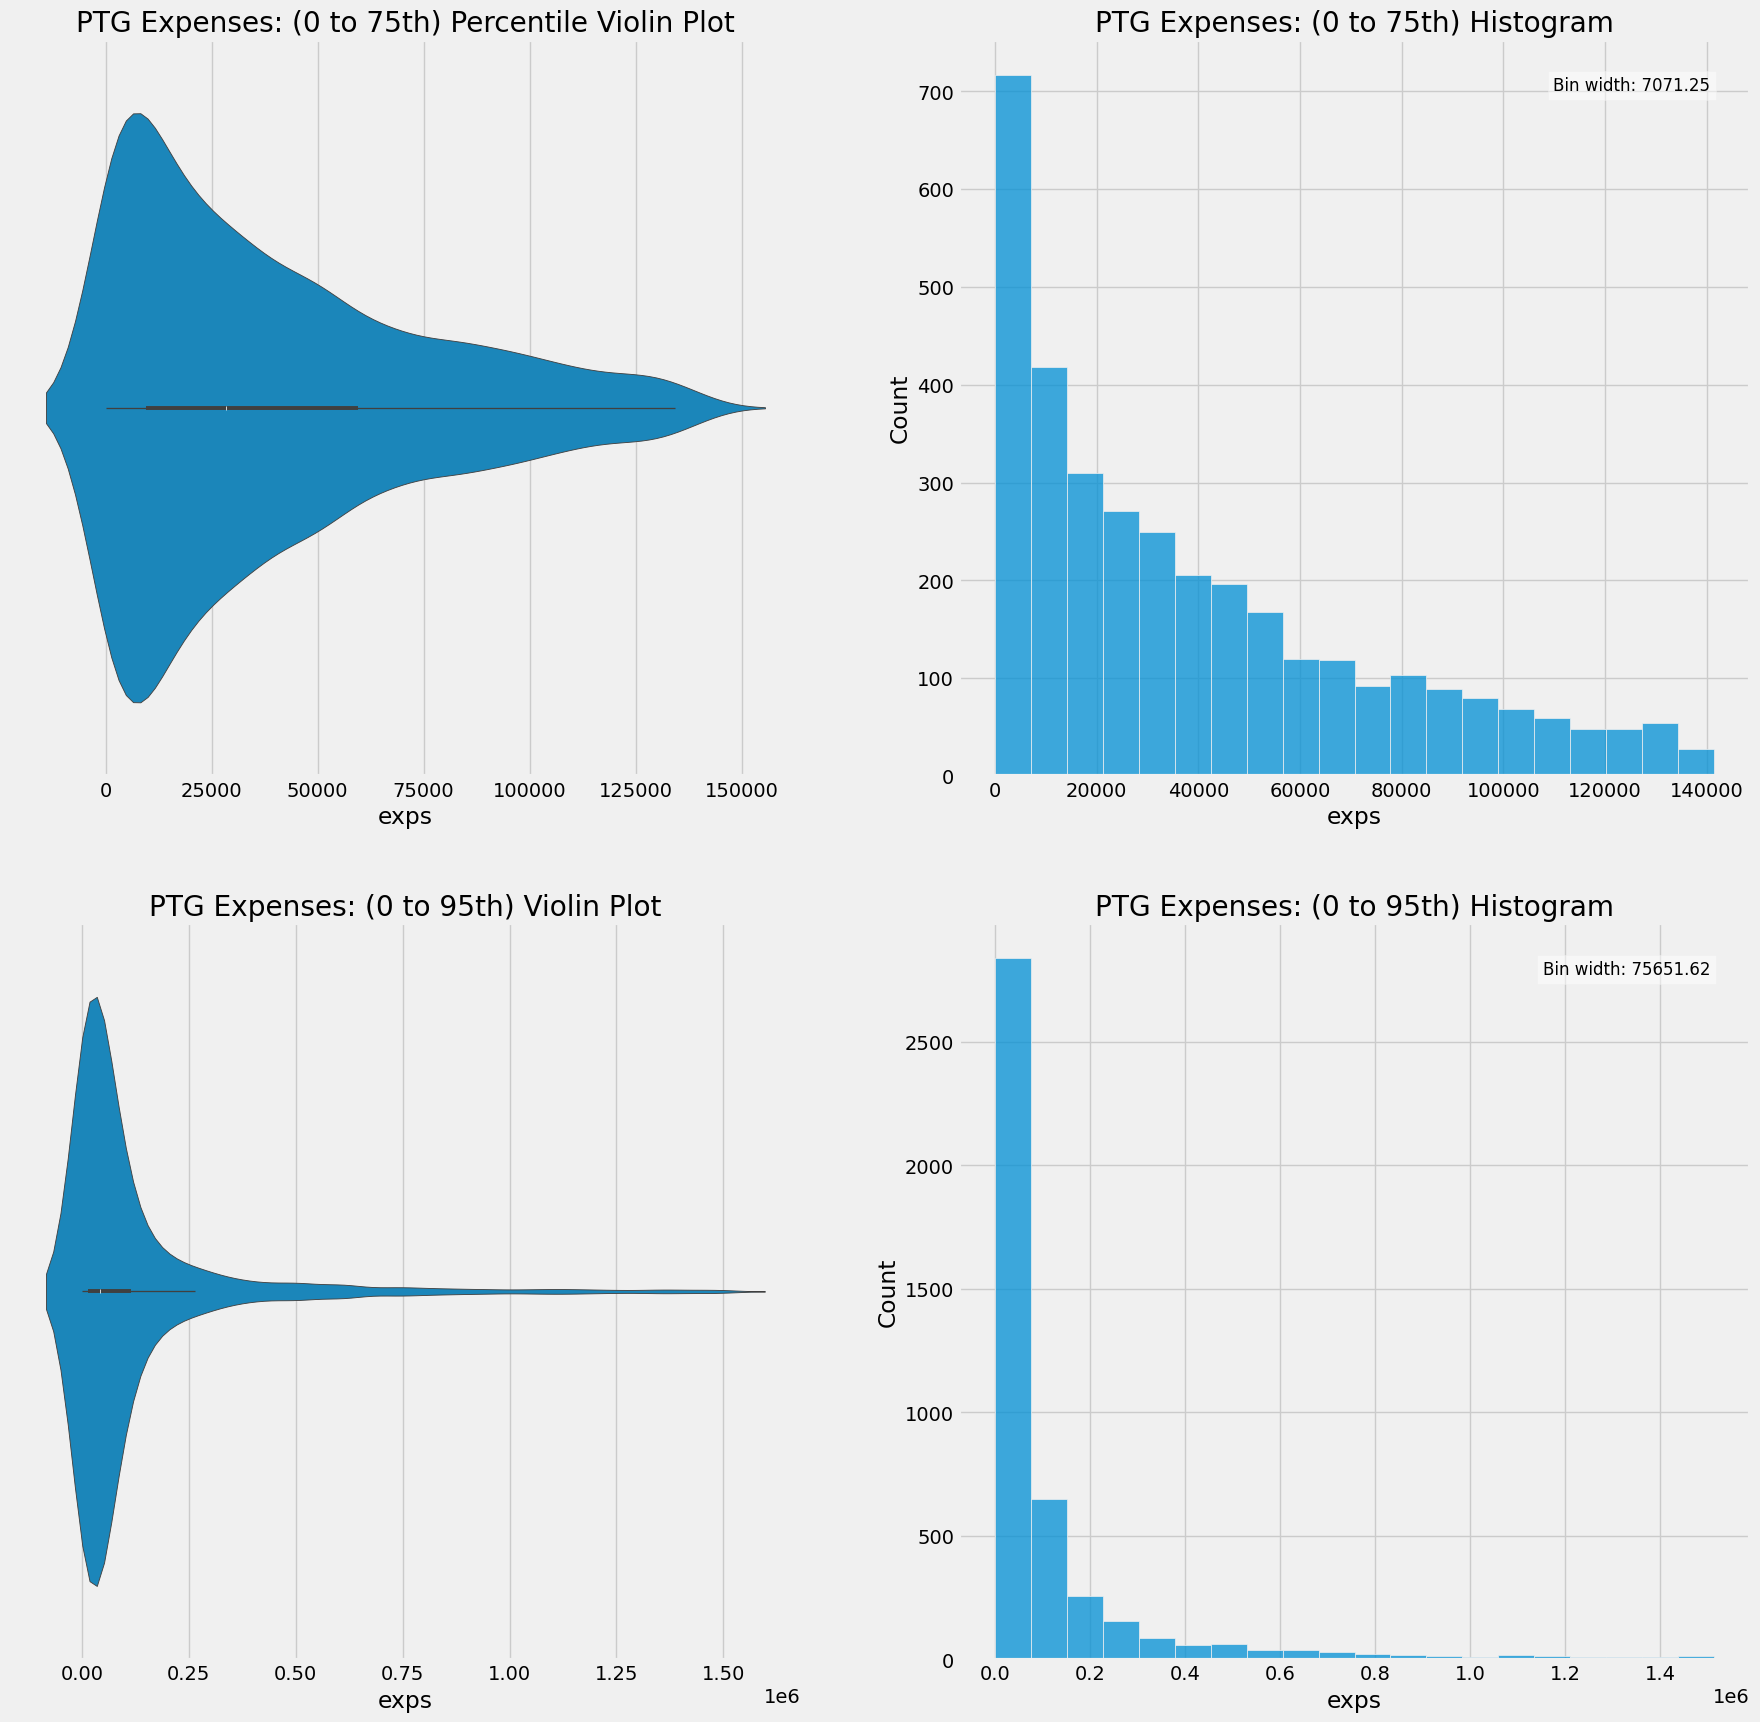

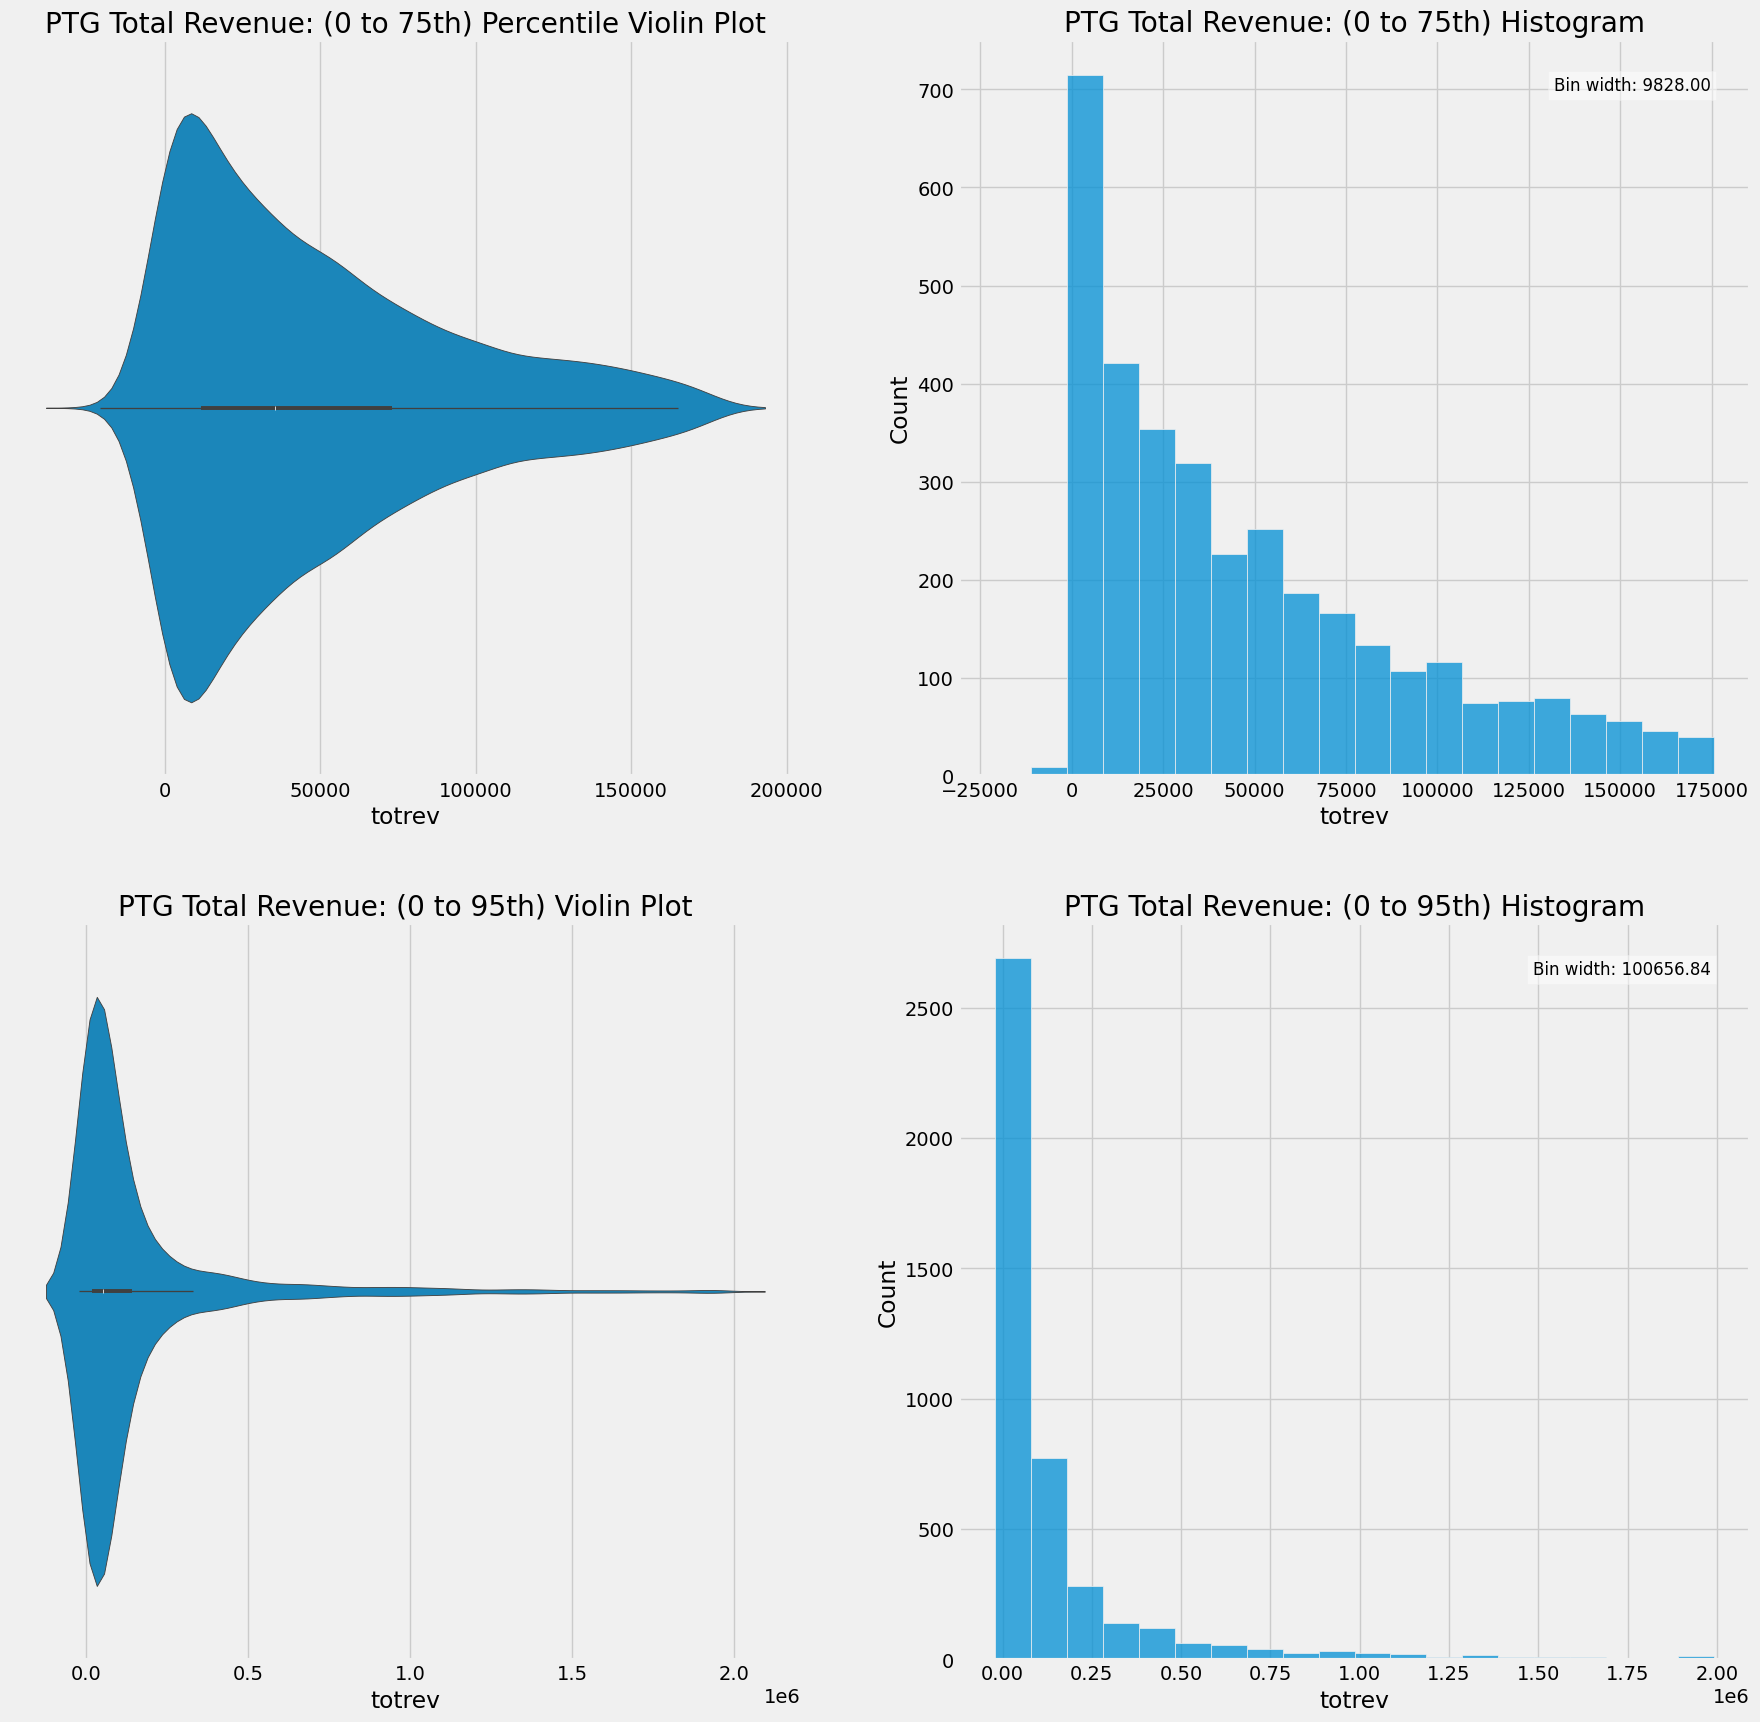

In [ ]:
visualize_hists(df, PTGs_ntee, "PTG", n_bins = 20)

In [ ]:
#visualize_hists(df, scholarship_ntee, title="Scholarship", n_bins=80)

In [ ]:

# visualize_hists(df, fundraising_main_ntee, title = "Fundraising", n_bins = 30)

In [ ]:
#visualize_hists(df, k_12, title = "K-12")

In [ ]:
#visualize_hists(df, B29_charters, title = "Charter", n_bins = 50)